# Predicting if the Insurance Claim is Fraudulent



## 1. Importing the libraries

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import datetime

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFECV
from numpy import set_printoptions

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [273]:
df = pd.read_csv('./fraud_oracle.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


## 2. Data Preprocessing and EDA

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [275]:
for i in df.columns:
    if i != "PolicyNumber": 
        items = df[i].unique().tolist()
        print(i)
        print(items)
    

Month
['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug', 'Jul', 'May', 'Sep']
WeekOfMonth
[5, 3, 2, 4, 1]
DayOfWeek
['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday', 'Thursday']
Make
['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac', 'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab', 'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus']
AccidentArea
['Urban', 'Rural']
DayOfWeekClaimed
['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday', 'Sunday', '0']
MonthClaimed
['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May', 'Jun', 'Sep', 'Oct', '0']
WeekOfMonthClaimed
[1, 4, 2, 3, 5]
Sex
['Female', 'Male']
MaritalStatus
['Single', 'Married', 'Widow', 'Divorced']
Age
[21, 34, 47, 65, 27, 20, 36, 0, 30, 42, 71, 52, 28, 61, 38, 41, 32, 40, 63, 31, 45, 60, 39, 55, 35, 44, 72, 29, 37, 59, 49, 50, 26, 48, 64, 33, 74, 23, 25, 56, 16, 68, 18, 51, 22, 53, 46, 43, 57, 54, 69, 67, 19, 78, 77, 75, 80, 58, 73, 24, 76, 62, 7

#### Dealing with the missing values


In [276]:
df.loc[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [277]:
df.loc[df['MonthClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [278]:
df.loc[df['Age']==0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,...,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils


In [279]:
#Dropping this entry is enough to solve the 1. and 2. problem 
df = df.drop(1516) 
df.reset_index(drop=True, inplace=True)

In [280]:
df.loc[:,["Age","AgeOfPolicyHolder"]]

,Age,AgeOfPolicyHolder
0,21,26 to 30
1,34,31 to 35
2,47,41 to 50
3,65,51 to 65
4,27,31 to 35
...,...,...
15414,35,31 to 35
15415,30,31 to 35
15416,24,26 to 30
15417,34,31 to 35


In [281]:
#It is obvious that Age does not contribute to the same person as AgeOfPolicyHolder (Claimer is not the same as the PolicyHolder)
#In order not to lose the entries i will fill them with the avarage of AgeOfPolicyHolder
for index, row in df.iterrows():
    if row["Age"] == 0:  # Check against integer 0
        age_of_policy_holder = row["AgeOfPolicyHolder"]
        avg_age = (int(age_of_policy_holder.split()[0]) + int(age_of_policy_holder.split()[2])) / 2
        df.at[index, 'Age'] = avg_age




C:\Users\User\AppData\Local\Temp\ipykernel_8236\3986437815.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '16.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'Age'] = avg_age


#### EDA

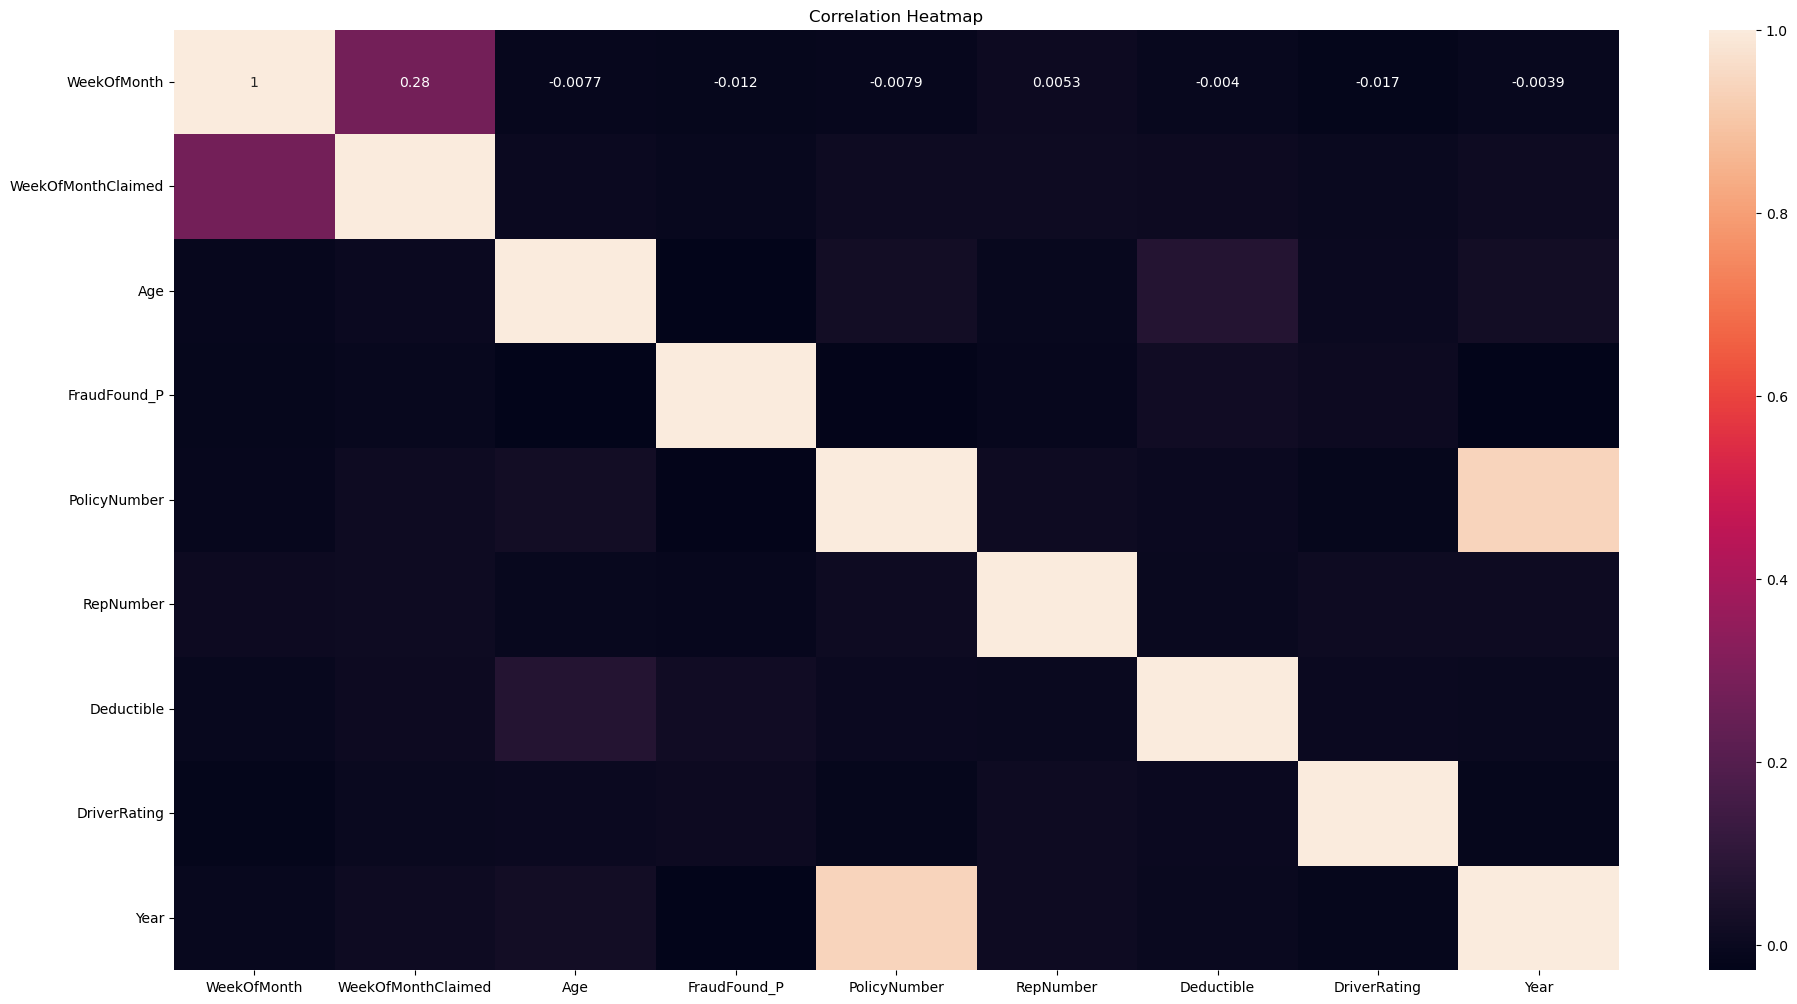

In [282]:
# Correlation between int features
fig = plt.figure(figsize=(20, 10))
object_columns = df.select_dtypes(include=['object']).columns
correlation_data = df.drop(
    object_columns , axis="columns"
).reset_index(drop=True)
dataplot = sns.heatmap(correlation_data.corr(), annot=True)
plt.tight_layout()
plt.title("Correlation Heatmap")
plt.show()

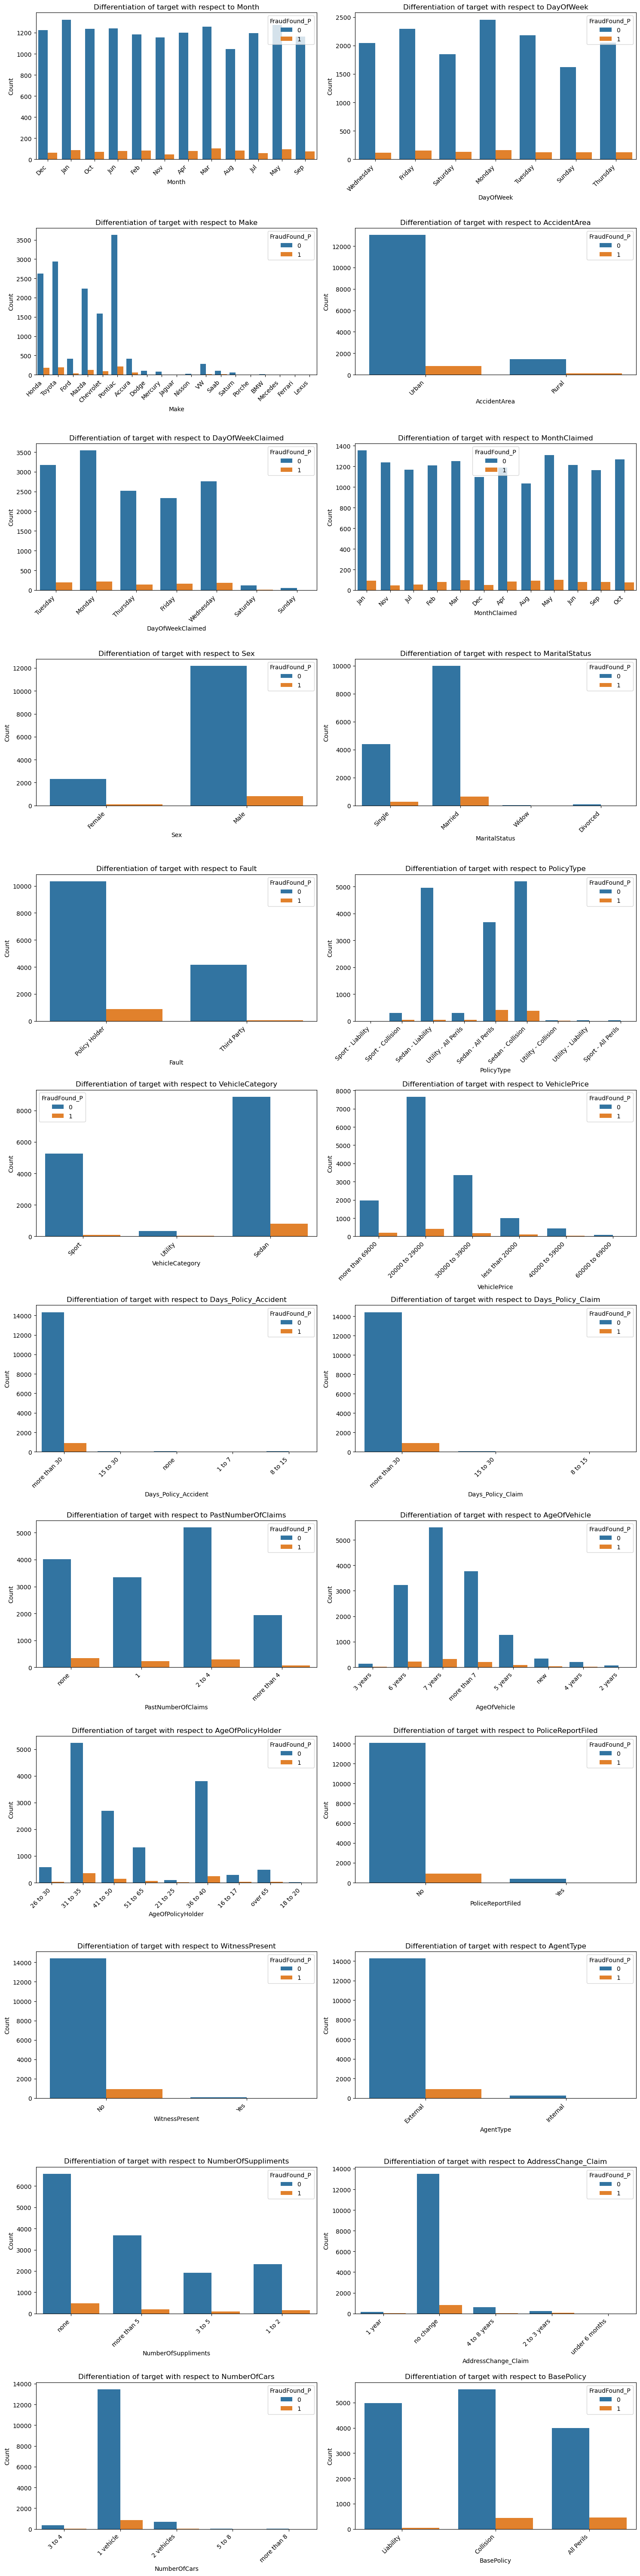

In [283]:
# Convert 'FraudFound_P' column to string type
df['FraudFound_P'] = df['FraudFound_P'].astype(str)

# Set the number of columns in the grid based on the number of object columns
num_cols = len(object_columns)
num_rows = (num_cols + 1) // 2  # Adjust this value as needed

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Plot each object column
for i, col in enumerate(object_columns):
    row = i // 2
    col_idx = i % 2
    sns.countplot(x=col, hue='FraudFound_P', data=df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Differentiation of target with respect to {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
    axes[row, col_idx].set_xticklabels(axes[row, col_idx].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Hide any unused subplots
for j in range(num_cols, num_rows * 2):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()


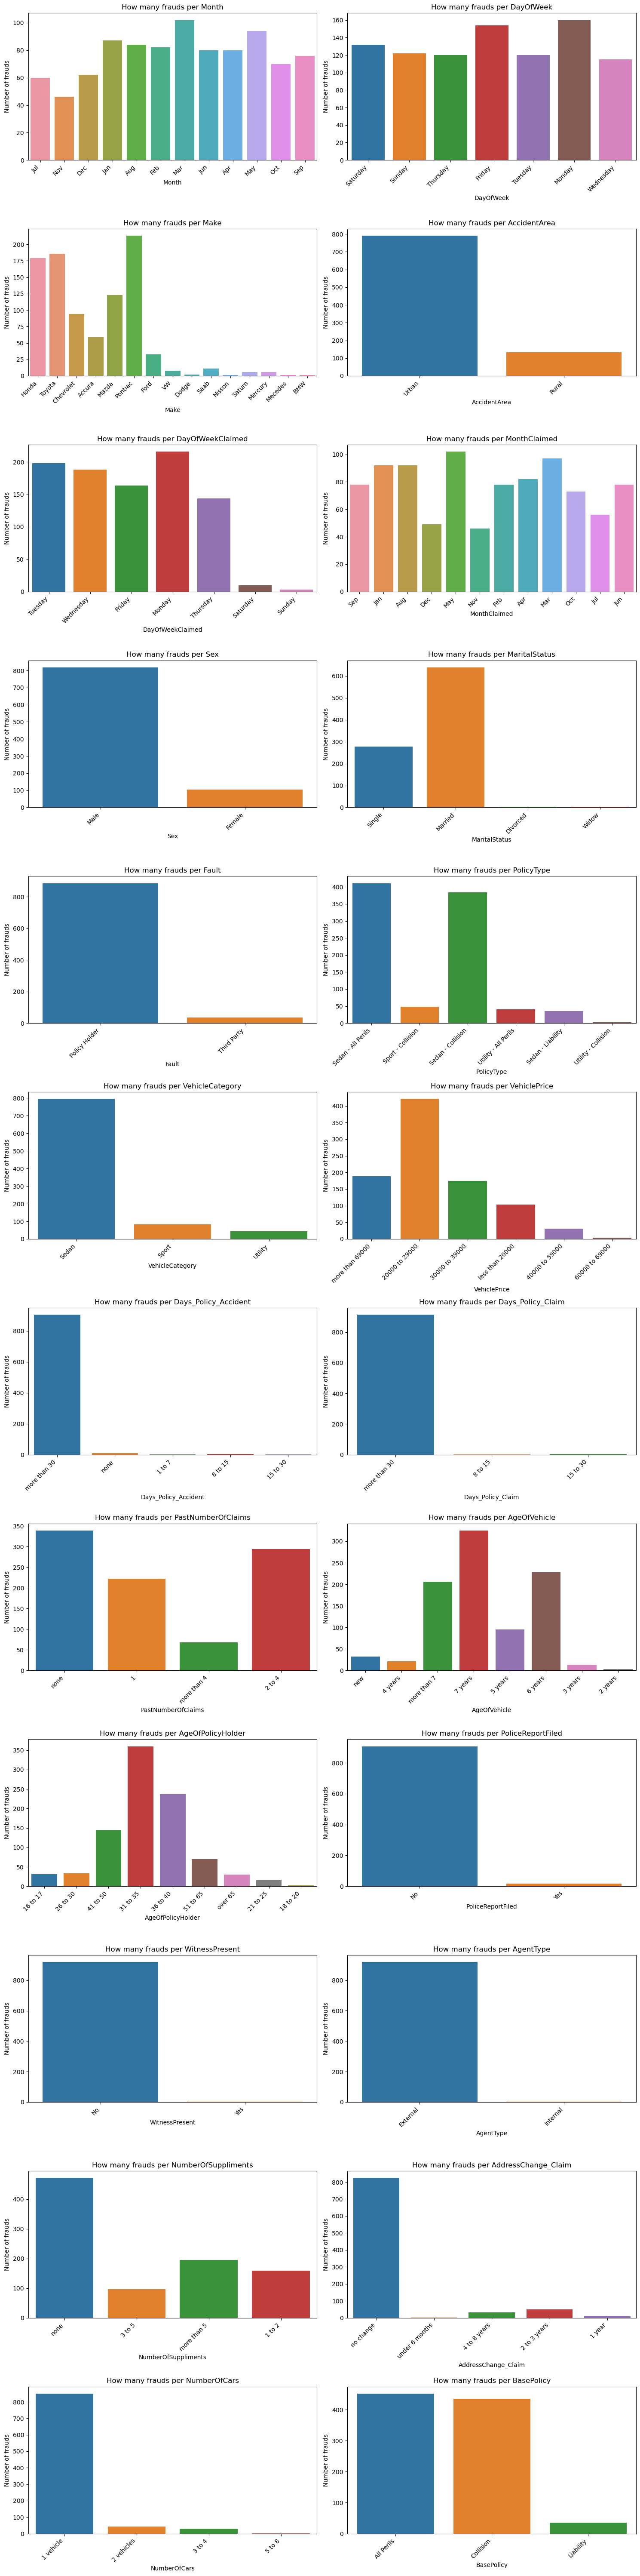

In [284]:
#Now, lets see where most frauds happen
df_fraud = df.loc[df["FraudFound_P"]=='1']
# Convert 'FraudFound_P' column to string type
df['FraudFound_P'] = df['FraudFound_P'].astype(str)

# Set the number of columns in the grid based on the number of object columns
num_cols = len(object_columns)
num_rows = (num_cols + 1) // 2  # Adjust this value as needed

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Plot each object column
for i, col in enumerate(object_columns):
    row = i // 2
    col_idx = i % 2
    sns.countplot(x=col, data=df_fraud, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'How many frauds per {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Number of frauds')
    axes[row, col_idx].set_xticklabels(axes[row, col_idx].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels

# Hide any unused subplots
for j in range(num_cols, num_rows * 2):
    fig.delaxes(axes[j // 2, j % 2])

plt.tight_layout()
plt.show()

#### Encoding object type features

In [285]:
object_columns

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [286]:
# AccidentArea, Sex, Fault, PoliceReportFiled, WitnessPresent, AgentType will be encoded binary with labelencoder

features_to_encode = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the LabelEncoder to each feature
for feature in features_to_encode:
    df[feature] = label_encoder.fit_transform(df[feature])

In [287]:
# 'Month', 'DayOfWeek','DayOfWeekClaimed','MonthClaimed', 'VehiclePrice','Days_Policy_Accident', 
# 'Days_Policy_Claim', 'PastNumberOfClaims','AgeOfVehicle', 'AgeOfPolicyHolder','NumberOfSuppliments',
# 'AddressChange_Claim', 'NumberOfCars' will be ordinal encoded

mapping = [
    {'col': 'Month', 'mapping': {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}},
    {'col': 'DayOfWeek', 'mapping': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}},
    {'col': 'DayOfWeekClaimed', 'mapping': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}},
    {'col': 'MonthClaimed', 'mapping': {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}},
    {'col': 'PastNumberOfClaims', 'mapping': {'none': 0, '1': 1, '2 to 4': 2, 'more than 4': 5}},
    {'col': 'NumberOfSuppliments', 'mapping': {'none': 0, '1 to 2': 1, '3 to 5': 3, 'more than 5': 6}},
    {'col': 'VehiclePrice', 'mapping': {'more than 69000': 74500, '20000 to 29000': 24500, '30000 to 39000': 34500, 'less than 20000': 14500,
                                         '40000 to 59000': 49500, '60000 to 69000': 64500}},
    {'col': 'AgeOfVehicle', 'mapping': {'3 years': 3, '6 years': 6, '7 years': 7, 'more than 7': 8, '5 years': 5, 'new': 0, '4 years': 4, '2 years': 2}},
    {'col': 'Days_Policy_Accident', 'mapping': {'more than 30': 31, '15 to 30': 22.5, 'none': 0, '1 to 7': 4, '8 to 15': 11.5}},
    {'col': 'Days_Policy_Claim', 'mapping': {'more than 30': 31, '15 to 30': 22.5, '8 to 15': 11.5, 'none': 0}},
    {'col': 'AgeOfPolicyHolder', 'mapping': {'26 to 30': 28, '31 to 35': 33, '41 to 50': 45.5, '51 to 65': 58, '21 to 25': 23, '36 to 40': 38, '16 to 17': 16.5,
                                              'over 65': 66, '18 to 20': 19}},
    {'col': 'AddressChange_Claim', 'mapping': {'1 year': 1, 'no change': 0, '4 to 8 years': 6, '2 to 3 years': 2.5, 'under 6 months': 0.5}},
    {'col': 'NumberOfCars', 'mapping': {'3 to 4': 3.5, '1 vehicle': 1, '2 vehicles': 2, '5 to 8': 6.5, 'more than 8': 9}}
]

for c in mapping:
    df[c["col"]] = df[c["col"]].map(c["mapping"])


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 15419 non-null  int64  
 1   WeekOfMonth           15419 non-null  int64  
 2   DayOfWeek             15419 non-null  int64  
 3   Make                  15419 non-null  object 
 4   AccidentArea          15419 non-null  int32  
 5   DayOfWeekClaimed      15419 non-null  int64  
 6   MonthClaimed          15419 non-null  int64  
 7   WeekOfMonthClaimed    15419 non-null  int64  
 8   Sex                   15419 non-null  int32  
 9   MaritalStatus         15419 non-null  object 
 10  Age                   15419 non-null  float64
 11  Fault                 15419 non-null  int32  
 12  PolicyType            15419 non-null  object 
 13  VehicleCategory       15419 non-null  object 
 14  VehiclePrice          15419 non-null  int64  
 15  FraudFound_P       

In [289]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded1 = one_hot_encoder.fit_transform(df[['Make']])
column_names1 = one_hot_encoder.get_feature_names_out(['Make'])
one_hot_encoded1_df = pd.DataFrame(one_hot_encoded1, columns=column_names1)

one_hot_encoded2 = one_hot_encoder.fit_transform(df[['MaritalStatus']])
column_names2 = one_hot_encoder.get_feature_names_out(['MaritalStatus'])
one_hot_encoded2_df = pd.DataFrame(one_hot_encoded2, columns=column_names2)

one_hot_encoded3 = one_hot_encoder.fit_transform(df[['PolicyType']])
column_names3 = one_hot_encoder.get_feature_names_out(['PolicyType'])
one_hot_encoded3_df = pd.DataFrame(one_hot_encoded3, columns=column_names3)

one_hot_encoded4 = one_hot_encoder.fit_transform(df[['VehicleCategory']])
column_names4 = one_hot_encoder.get_feature_names_out(['VehicleCategory'])
one_hot_encoded4_df = pd.DataFrame(one_hot_encoded4, columns=column_names4)

one_hot_encoded5 = one_hot_encoder.fit_transform(df[['BasePolicy']])
column_names5 = one_hot_encoder.get_feature_names_out(['BasePolicy'])
one_hot_encoded5_df = pd.DataFrame(one_hot_encoded5, columns=column_names5)

encoded_df = pd.concat(
    [df.drop(columns=['Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy'])
, one_hot_encoded1_df,  one_hot_encoded2_df,  one_hot_encoded3_df,  one_hot_encoded4_df,  one_hot_encoded5_df], axis=1
)

In [290]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15419 entries, 0 to 15418
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            15419 non-null  int64  
 1   WeekOfMonth                      15419 non-null  int64  
 2   DayOfWeek                        15419 non-null  int64  
 3   AccidentArea                     15419 non-null  int32  
 4   DayOfWeekClaimed                 15419 non-null  int64  
 5   MonthClaimed                     15419 non-null  int64  
 6   WeekOfMonthClaimed               15419 non-null  int64  
 7   Sex                              15419 non-null  int32  
 8   Age                              15419 non-null  float64
 9   Fault                            15419 non-null  int32  
 10  VehiclePrice                     15419 non-null  int64  
 11  FraudFound_P                     15419 non-null  object 
 12  PolicyNumber      

#### Feature Extraction


In [291]:
# Because Days_Policy_Accident and Days_Policy_Claim are often in the catergory over 30, i will extract a new feature for the time interval
def calculate_interval_in_weeks(row):
    # Define mappings for integer-encoded month and day of the week
    month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    dayofweek_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

    # Convert integer-encoded month and day of the week to their corresponding names
    month1_name = month_mapping[row['Month']]
    month2_name = month_mapping[row['MonthClaimed']]
    dayofweek1_name = dayofweek_mapping[row['DayOfWeek']]
    dayofweek2_name = dayofweek_mapping[row['DayOfWeekClaimed']]

    # Get the current year
    current_year = datetime.datetime.now().year

    # Convert month and week of month to days
    weekofmonth1 = int(row['WeekOfMonth'])
    weekofmonth2 = int(row['WeekOfMonthClaimed'])
    date1 = datetime.datetime.strptime(f'{month1_name}-1-{current_year}', '%B-%d-%Y') + datetime.timedelta(weeks=(weekofmonth1 - 1))
    date2 = datetime.datetime.strptime(f'{month2_name}-1-{current_year}', '%B-%d-%Y') + datetime.timedelta(weeks=(weekofmonth2 - 1))

    # Find the first occurrence of the given day of the week after the start of the month
    while date1.strftime('%A') != dayofweek1_name:
        date1 += datetime.timedelta(days=1)
    while date2.strftime('%A') != dayofweek2_name:
        date2 += datetime.timedelta(days=1)

    # Calculate the interval in weeks
    interval_in_days = (date2 - date1).days
    interval_in_weeks = interval_in_days / 7
    if interval_in_weeks > 0:
        return interval_in_weeks
    else:
        return interval_in_weeks + 52.143
        


# Apply the function to the DataFrame
encoded_df['IntervalInWeeks'] = encoded_df.apply(calculate_interval_in_weeks, axis=1)

# Display the DataFrame with the interval in weeks calculated
print(encoded_df)

       Month  WeekOfMonth  DayOfWeek  AccidentArea  DayOfWeekClaimed  \
0         12            5          3             1                 2   
1          1            3          3             1                 1   
2         10            5          5             1                 4   
3          6            2          6             0                 5   
4          1            5          1             1                 2   
...      ...          ...        ...           ...               ...   
15414     11            4          5             1                 2   
15415     11            5          4             1                 5   
15416     11            5          4             0                 5   
15417     12            1          1             1                 4   
15418     12            2          3             1                 4   

       MonthClaimed  WeekOfMonthClaimed  Sex   Age  Fault  ...  \
0                 1                   1    0  21.0      0  ...   
1  

# 3. Training the first models

In [292]:
sm = SMOTE(random_state=42)
X = encoded_df.drop('FraudFound_P', axis=1)
y = encoded_df['FraudFound_P']
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
#X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12335, 66)
(3084, 66)
(12335,)
(3084,)


In [293]:
ada = AdaBoostClassifier(estimator=dt, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
rf = RandomForestClassifier(n_estimators = 10, random_state = 1)
dt = DecisionTreeClassifier(random_state=42)
ada.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(random_state=42)

In [294]:
ada_pred = ada.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

In [295]:
ada_acc = accuracy_score(y_test, ada_pred)
ada_bal_acc = balanced_accuracy_score(y_test, ada_pred)
ada_prec = precision_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_roc_auc = roc_auc_score(y_test, ada_pred)

rf_acc = accuracy_score(y_test, rf_pred)
rf_bal_acc = balanced_accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

dt_acc = accuracy_score(y_test, dt_pred)
dt_bal_acc = balanced_accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)


In [296]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Not a Fraud', 'Fraud'], yticklabels=['Not a Fraud', 'Fraud'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

AdaBoost
Accuracy: 0.9130998702983139
balanced_accuracy: 0.6223171084157632
f1_score: 0.2872340425531915
recall_score: 0.2918918918918919
precision_score: 0.28272251308900526
roc_auc_score: 0.6223171084157632
roc_auc_score: 0.6223171084157632
[[2762  137]
 [ 131   54]]


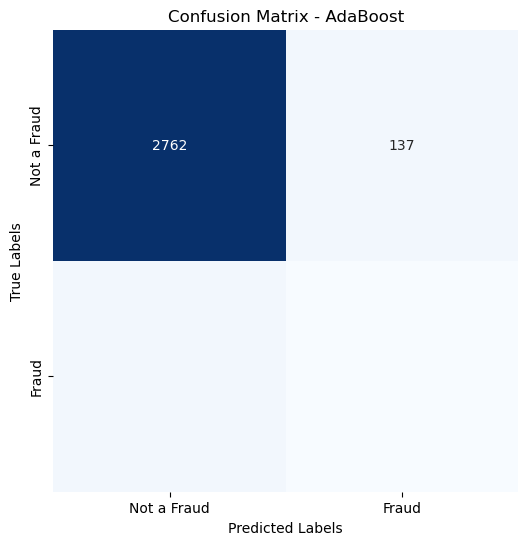

In [297]:
print('AdaBoost')
print("Accuracy:",accuracy_score(y_test, ada_pred))
print("balanced_accuracy:",balanced_accuracy_score(y_test, ada_pred))
print("f1_score:",f1_score(y_test,ada_pred))
print("recall_score:",recall_score(y_test, ada_pred))
print("precision_score:",precision_score(y_test, ada_pred))
print("roc_auc_score:",roc_auc_score(y_test, ada_pred))
print("roc_auc_score:",roc_auc_score(y_test, ada_pred))
print(confusion_matrix(y_test, ada_pred))
plot_confusion_matrix(y_test, ada_pred, 'AdaBoost')

Random Forest
Accuracy: 0.9400129701686122
balanced_accuracy: 0.5101209177442361
f1_score: 0.04145077720207254
recall_score: 0.021621621621621623
precision_score: 0.5
roc_auc_score: 0.5101209177442361
[[2895    4]
 [ 181    4]]


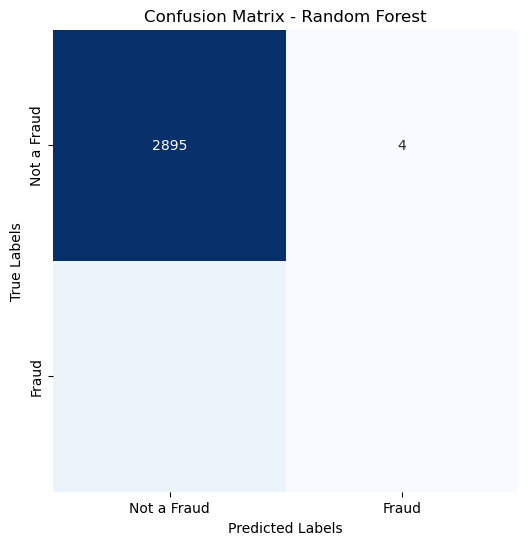

In [298]:
print('Random Forest')
print("Accuracy:",accuracy_score(y_test, rf_pred))
print("balanced_accuracy:",balanced_accuracy_score(y_test,  rf_pred))
print("f1_score:",f1_score(y_test, rf_pred))
print("recall_score:",recall_score(y_test,  rf_pred))
print("precision_score:",precision_score(y_test,  rf_pred))
print("roc_auc_score:",roc_auc_score(y_test,  rf_pred))
print(confusion_matrix(y_test, rf_pred))
plot_confusion_matrix(y_test,  rf_pred, 'Random Forest')

Decision Tree
Accuracy: 0.9186121919584954
balanced_accuracy: 0.6556119071814139
f1_score: 0.34464751958224543
recall_score: 0.3567567567567568
precision_score: 0.3333333333333333
roc_auc_score: 0.6556119071814139
[[2767  132]
 [ 119   66]]


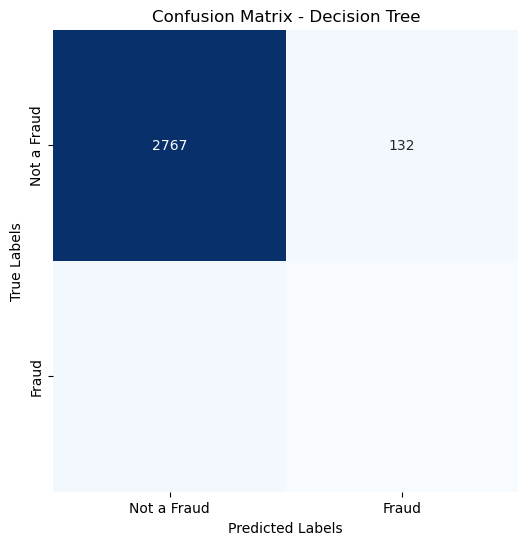

In [299]:
print('Decision Tree')
print("Accuracy:",accuracy_score(y_test, dt_pred))
print("balanced_accuracy:",balanced_accuracy_score(y_test, dt_pred))
print("f1_score:",f1_score(y_test,dt_pred))
print("recall_score:",recall_score(y_test, dt_pred))
print("precision_score:",precision_score(y_test, dt_pred))
print("roc_auc_score:",roc_auc_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree')

#### Balanced Random Forest

C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


B Random Forest
Accuracy: 0.6929312581063554
balanced_accuracy: 0.8037748338196768
f1_score: 0.2664601084430674
recall_score: 0.9297297297297298
precision_score: 0.15551537070524413
roc_auc_score: 0.8037748338196768
[[1965  934]
 [  13  172]]


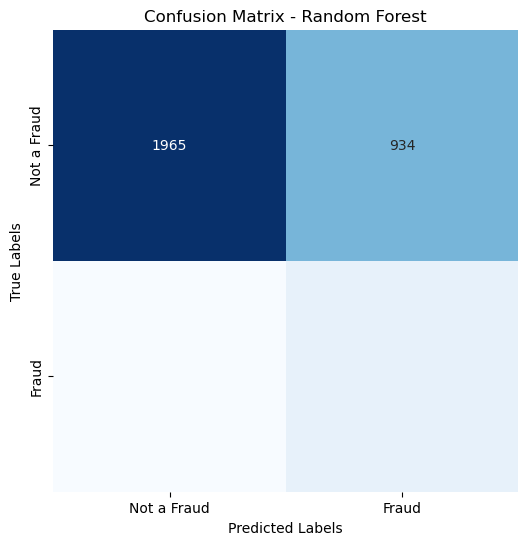

In [300]:
brf = BalancedRandomForestClassifier(n_estimators=150, random_state=42)
brf.fit(X_train,y_train)
brf_pred = brf.predict(X_test)

brf_acc = accuracy_score(y_test, brf_pred)
brf_bal_acc = balanced_accuracy_score(y_test, brf_pred)
brf_prec = precision_score(y_test, brf_pred)
brf_f1 = f1_score(y_test, brf_pred)
brf_recall = recall_score(y_test, brf_pred)
brf_roc_auc = roc_auc_score(y_test, brf_pred)

print('B Random Forest')
print("Accuracy:",accuracy_score(y_test, brf_pred))
print("balanced_accuracy:",balanced_accuracy_score(y_test,  brf_pred))
print("f1_score:",f1_score(y_test, brf_pred))
print("recall_score:",recall_score(y_test,  brf_pred))
print("precision_score:",precision_score(y_test,  brf_pred))
print("roc_auc_score:",roc_auc_score(y_test,  brf_pred))
print(confusion_matrix(y_test, brf_pred))
plot_confusion_matrix(y_test,  brf_pred, 'Random Forest')

#### Voting

C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting
Accuracy: 0.8138780804150454
balanced_accuracy: 0.7871400203238769
f1_score: 0.32786885245901637
recall_score: 0.7567567567567568
precision_score: 0.20926756352765322
roc_auc_score: 0.7871400203238769
[[2370  529]
 [  45  140]]


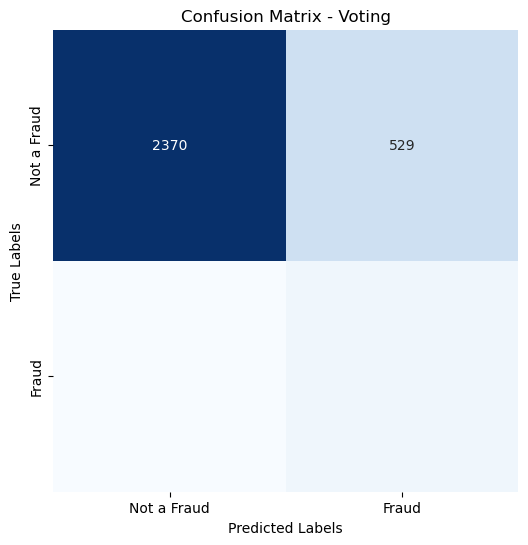

In [301]:
vt = VotingClassifier(estimators=[('brf', brf), ('ada', ada)], voting='soft',weights=[0.8, 0.2])
vt.fit(X_train, y_train)
vt_pred = vt.predict(X_test)

vt_acc = accuracy_score(y_test, vt_pred)
vt_bal_acc = balanced_accuracy_score(y_test, vt_pred)
vt_prec = precision_score(y_test, vt_pred)
vt_f1 = f1_score(y_test, vt_pred)
vt_recall = recall_score(y_test, vt_pred)
vt_roc_auc = roc_auc_score(y_test, vt_pred)

print('Voting')
print("Accuracy:",accuracy_score(y_test, vt_pred))
print("balanced_accuracy:",balanced_accuracy_score(y_test,  vt_pred))
print("f1_score:",f1_score(y_test, vt_pred))
print("recall_score:",recall_score(y_test,  vt_pred))
print("precision_score:",precision_score(y_test,  vt_pred))
print("roc_auc_score:",roc_auc_score(y_test,  vt_pred))
print(confusion_matrix(y_test, vt_pred))
plot_confusion_matrix(y_test,  vt_pred, 'Voting')

In [302]:

data = {
    'Model': ['Decision Tree', 'AdaBoost', 'Balanced Random Forest', 'Random Forest', 'Voting'],
    'Accuracy': [dt_acc, ada_acc, brf_acc, rf_acc, vt_acc],
    'Balanced Accuracy': [dt_bal_acc, ada_bal_acc, brf_bal_acc, rf_bal_acc, vt_bal_acc],
    'Precision': [dt_prec, ada_prec, brf_prec, rf_prec, vt_prec],
    'F1 Score': [dt_f1, ada_f1, brf_f1, rf_f1, vt_f1],
    'Recall': [dt_recall, ada_recall, brf_recall, rf_recall, vt_recall],
    'ROC AUC': [dt_roc_auc, ada_roc_auc, brf_roc_auc, rf_roc_auc, vt_roc_auc]
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)

# Display the DataFrame
metrics_df

,Model,Accuracy,Balanced Accuracy,Precision,F1 Score,Recall,ROC AUC
0,Decision Tree,0.918612,0.655612,0.333333,0.344648,0.356757,0.655612
1,AdaBoost,0.913100,0.622317,0.282723,0.287234,0.291892,0.622317
2,Balanced Random Forest,0.692931,0.803775,0.155515,0.266460,0.929730,0.803775
3,Random Forest,0.940013,0.510121,0.500000,0.041451,0.021622,0.510121
4,Voting,0.813878,0.787140,0.209268,0.327869,0.756757,0.787140


# 4. Feature selection and Hyperparameter optimization


## Feature selection

#### Univariate selection

In [303]:
test = SelectKBest(score_func=f_classif, k=15)
fit = test.fit(X_train, y_train)
cols = test.get_support(indices=True)
X_new = X_train.iloc[:,cols]
X_new

C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Month,Fault,PastNumberOfClaims,Make_Accura,PolicyType_Sedan - All Perils,PolicyType_Sedan - Liability,PolicyType_Sport - Collision,PolicyType_Utility - All Perils,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability,IntervalInWeeks
6619,9,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.428571
9591,7,0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,15.142857
2061,9,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,52.000143
14862,11,1,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.857143
4997,12,0,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,9,0,5,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.142857
6250,10,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,51.714429
5044,8,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,52.143000
10277,2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,51.428714


In [304]:
set_printoptions(precision=3)
print("Decision tree",dt.feature_importances_)
print("Adaboost",ada.feature_importances_)
print("B Random Forest",brf.feature_importances_)
print("Random Forest",rf.feature_importances_)

Decision tree [0.081 0.017 0.03  0.006 0.034 0.059 0.027 0.004 0.088 0.033 0.021 0.185
 0.063 0.036 0.027 0.005 0.003 0.018 0.03  0.014 0.001 0.001 0.001 0.019
 0.005 0.01  0.001 0.006 0.001 0.01  0.    0.    0.008 0.008 0.    0.
 0.005 0.    0.003 0.    0.008 0.    0.002 0.003 0.008 0.002 0.001 0.004
 0.006 0.001 0.001 0.01  0.    0.    0.007 0.    0.002 0.    0.    0.
 0.    0.    0.001 0.    0.023 0.064]
Adaboost [8.439e-02 2.230e-02 2.983e-02 7.466e-03 3.595e-02 5.016e-02 2.511e-02
 4.657e-03 6.792e-02 3.295e-02 2.695e-02 1.865e-01 5.593e-02 3.529e-02
 2.854e-02 4.674e-03 1.875e-03 2.028e-02 3.205e-02 3.233e-02 1.079e-03
 1.311e-03 1.297e-03 1.729e-02 5.598e-03 6.519e-03 2.105e-03 7.961e-03
 1.180e-03 1.191e-02 0.000e+00 0.000e+00 5.883e-03 1.301e-02 0.000e+00
 0.000e+00 8.202e-03 0.000e+00 2.643e-03 3.584e-17 1.331e-03 0.000e+00
 2.738e-03 3.857e-03 8.892e-03 1.709e-03 1.096e-03 3.739e-03 7.509e-04
 1.176e-03 9.608e-04 8.684e-03 0.000e+00 1.920e-18 8.064e-03 0.000e+00
 2.182e-03 2

#### RFE CV

In [317]:
rfeada = RFECV(ada, min_features_to_select = 15, cv=5)
fit = rfeada.fit(X_train, y_train.values.ravel())
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\an

Num Features: 15
Selected Features: [ True  True  True False  True  True False False  True  True  True  True
  True  True  True False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True  True]
Feature Ranking: [ 1  1  1 18  1  1  2 26  1  1  1  1  1  1  1 16 23  1  3  9 30 28 31  5
  6 12 44  8 29 11 36 50 15  4 49 43 10 35 21 45 25 37 27 22 17 24 34 20
 14 32 38 13 41 42  7 47 19 48 51 52 39 46 40 33  1  1]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [318]:
result = np.where(fit.ranking_ == 1)[0]
X_trainada = X_train.iloc[:,result]
X_testada = X_test.iloc[:,result]
X_testada

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,Age,Fault,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,PastNumberOfClaims,BasePolicy_Liability,IntervalInWeeks
8922,12,5,4,1,1,32.0,1,49500,8924,7,400,4,2,0.0,-0.285571
4275,7,4,7,2,7,21.0,1,24500,4277,16,400,3,2,0.0,51.428714
3408,12,1,1,1,12,35.0,0,24500,3410,9,400,2,1,1.0,2.000000
10675,4,2,2,1,4,52.0,1,34500,10677,10,400,2,0,0.0,0.857143
3285,12,1,2,3,12,50.0,0,24500,3287,1,700,4,1,0.0,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,5,1,6,2,5,30.0,0,24500,5931,9,400,4,1,1.0,1.428571
6533,9,1,3,1,9,54.0,0,49500,6535,2,400,3,1,0.0,1.714286
15344,11,2,2,5,11,46.0,0,24500,15346,11,700,1,0,0.0,0.428571
4004,10,1,4,4,10,37.0,0,24500,4006,8,400,1,2,0.0,52.143000


In [310]:
rfebrf = RFECV(brf, min_features_to_select = 15, cv=5)
fit = rfebrf.fit(X_train, y_train.values.ravel())
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\User

Num Features: 16
Selected Features: [ True  True  True False  True  True  True False  True  True False  True
  True False False False False  True  True False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False  True  True]
Feature Ranking: [ 1  1  1 19  1  1  1 18  1  1  4  1  1  9  3 32 35  1  1  5 25 39 33  7
  1 23  6 24 43 22 36 51 27 16 48 50 20 46 31 41 13 47 34 37 12 30 38 15
 17 42 14 21  1 45 26 49 29 40 44 10  2 28 11  8  1  1]


In [316]:
result = np.where(fit.ranking_ == 1)[0]
X_trainbrf = X_train.iloc[:,result]
X_testbrf = X_test.iloc[:,result]
X_testbrf

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,Fault,PolicyNumber,RepNumber,PastNumberOfClaims,AgeOfVehicle,AddressChange_Claim,PolicyType_Sedan - Liability,BasePolicy_Liability,IntervalInWeeks
8922,12,5,4,1,1,1,32.0,1,8924,7,2,7,0.0,0.0,0.0,-0.285571
4275,7,4,7,2,7,4,21.0,1,4277,16,2,5,0.0,0.0,0.0,51.428714
3408,12,1,1,1,12,3,35.0,0,3410,9,1,7,0.0,1.0,1.0,2.000000
10675,4,2,2,1,4,3,52.0,1,10677,10,0,8,0.0,0.0,0.0,0.857143
3285,12,1,2,3,12,2,50.0,0,3287,1,1,7,0.0,0.0,0.0,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,5,1,6,2,5,2,30.0,0,5931,9,1,7,0.0,1.0,1.0,1.428571
6533,9,1,3,1,9,3,54.0,0,6535,2,1,6,0.0,0.0,0.0,1.714286
15344,11,2,2,5,11,3,46.0,0,15346,11,0,8,0.0,0.0,0.0,0.428571
4004,10,1,4,4,10,1,37.0,0,4006,8,2,6,0.0,0.0,0.0,52.143000


In [340]:
X_trainbrf

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Age,Fault,PolicyNumber,RepNumber,PastNumberOfClaims,AgeOfVehicle,AddressChange_Claim,PolicyType_Sedan - Liability,BasePolicy_Liability,IntervalInWeeks
6619,9,4,6,2,10,1,29.0,0,6621,16,1,5,0.0,0.0,0.0,0.428571
9591,7,2,1,2,10,4,43.0,0,9593,12,2,7,0.0,0.0,0.0,15.142857
2061,9,2,4,3,9,2,31.0,0,2063,14,0,6,0.0,1.0,1.0,52.000143
14862,11,3,4,3,12,3,40.0,1,14864,13,2,7,0.0,1.0,1.0,3.857143
4997,12,3,3,4,12,4,37.0,0,4999,5,5,7,2.5,1.0,1.0,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,9,1,4,5,9,1,36.0,0,2831,16,5,7,0.0,1.0,1.0,0.142857
6250,10,4,5,2,10,4,37.0,0,6252,15,2,7,0.0,0.0,0.0,51.714429
5044,8,2,3,3,8,2,39.0,0,5046,7,2,7,0.0,1.0,1.0,52.143000
10277,2,4,3,5,2,4,31.0,1,10279,15,0,6,0.0,0.0,0.0,51.428714


## Hyperparameter optimization

#### Optimizing AdaBoost

In [331]:
decision_tree_params = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree_search = RandomizedSearchCV(estimator=decision_tree, 
                                          param_distributions=decision_tree_params, 
                                          n_iter=50, 
                                          cv=3, 
                                          verbose=5, 
                                          random_state=42, 
                                          n_jobs=-1)
decision_tree_search.fit(X_trainada, y_train)

# Get the best parameters for the decision tree
best_decision_tree_params = decision_tree_search.best_params_

adaboost_params = {
    'n_estimators': [50, 100, 200, 400, 800],
    'learning_rate': [0.001, 0.01, 0.1, 0.3, 1, 3],
}

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(**best_decision_tree_params),
                         random_state=42)

# Create the random search for AdaBoostClassifier
random_search = {
    **adaboost_params
}

model = RandomizedSearchCV(estimator=ada,
                           param_distributions=random_search,
                           n_iter=10,
                           cv=3, 
                           verbose=5, 
                           random_state=1, 
                           n_jobs=-1)

model.fit(X_trainada, y_train)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\skle

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                 min_samples_split=5),
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1, 0.3,
                                                          1, 3],
                                        'n_estimators': [50, 100, 200, 400,
                                                         800]},
                   random_state=1, verbose=5)

In [332]:
model.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_split=5),
                   learning_rate=0.3, n_estimators=200, random_state=42)

In [335]:
y_predada = model.best_estimator_.predict(X_testada)
ada_acc = accuracy_score(y_test, y_predada)
ada_bal_acc = balanced_accuracy_score(y_test, y_predada)
ada_prec = precision_score(y_test, y_predada)
ada_f1 = f1_score(y_test, y_predada)
ada_recall = recall_score(y_test, y_predada)
ada_roc_auc = roc_auc_score(y_test, y_predada)

In [352]:
ada_acc

0.9130998702983139

AdaBoost
Accuracy: 0.9584954604409858
balanced_accuracy: 0.727430707699766
f1_score: 0.5733333333333334
recall_score: 0.4648648648648649
precision_score: 0.7478260869565218
roc_auc_score: 0.7274307076997661
roc_auc_score: 0.7274307076997661
[[2870   29]
 [  99   86]]


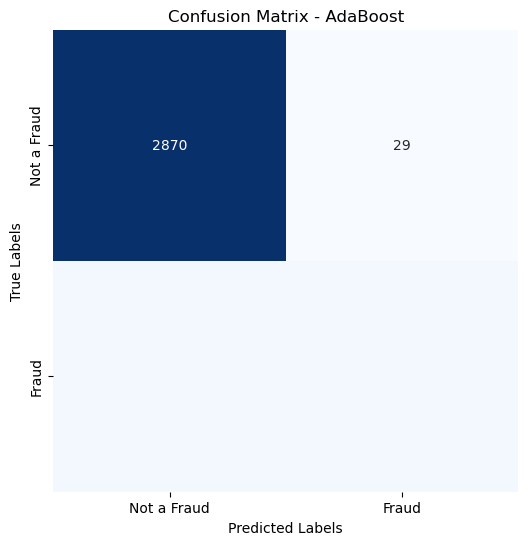

In [353]:
print('AdaBoost')
print("Accuracy:",accuracy_score(y_test, y_predada))
print("balanced_accuracy:",balanced_accuracy_score(y_test, y_predada))
print("f1_score:",f1_score(y_test,y_predada))
print("recall_score:",recall_score(y_test, y_predada))
print("precision_score:",precision_score(y_test, y_predada))
print("roc_auc_score:",roc_auc_score(y_test, y_predada))
print("roc_auc_score:",roc_auc_score(y_test, y_predada))
print(confusion_matrix(y_test, y_predada))
plot_confusion_matrix(y_test, y_predada, 'AdaBoost')

#### Optimizing Balance Random Forest

In [338]:
# Define the parameters for BalancedRandomForestClassifier
balanced_random_forest_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform a randomized search to tune the BalancedRandomForestClassifier
balanced_random_forest = BalancedRandomForestClassifier(random_state=42)
balanced_random_forest_search = RandomizedSearchCV(estimator=balanced_random_forest, 
                                                  param_distributions=balanced_random_forest_params, 
                                                  n_iter=10, 
                                                  cv=3, 
                                                  verbose=5, 
                                                  random_state=42, 
                                                  n_jobs=-1)
balanced_random_forest_search.fit(X_trainbrf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


RandomizedSearchCV(cv=3,
                   estimator=BalancedRandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=5)

In [341]:
y_predbrf = balanced_random_forest_search.best_estimator_.predict(X_testbrf)
brf_acc = accuracy_score(y_test, y_predbrf)
brf_bal_acc = balanced_accuracy_score(y_test, y_predbrf)
brf_prec = precision_score(y_test, y_predbrf)
brf_f1 = f1_score(y_test,y_predbrf)
brf_recall = recall_score(y_test, y_predbrf)
brf_roc_auc = roc_auc_score(y_test, y_predbrf)



B Random Forest
Accuracy: 0.703307392996109
balanced_accuracy: 0.8143544372243924
f1_score: 0.2755344418052256
recall_score: 0.9405405405405406
precision_score: 0.1614100185528757
roc_auc_score: 0.8143544372243925
[[1995  904]
 [  11  174]]


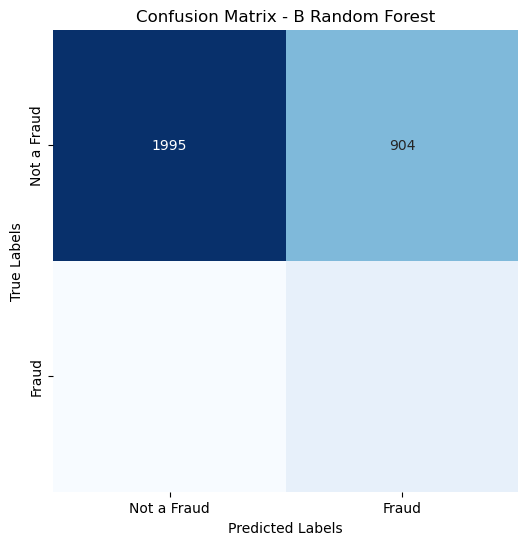

In [342]:
print('B Random Forest')
print("Accuracy:",accuracy_score(y_test, y_predbrf))
print("balanced_accuracy:",balanced_accuracy_score(y_test, y_predbrf))
print("f1_score:",f1_score(y_test, y_predbrf))
print("recall_score:",recall_score(y_test,  y_predbrf))
print("precision_score:",precision_score(y_test, y_predbrf))
print("roc_auc_score:",roc_auc_score(y_test, y_predbrf))
print(confusion_matrix(y_test, y_predbrf))
plot_confusion_matrix(y_test,  y_predbrf, 'B Random Forest')

#### Optimizing Voting

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier (Best Estimator)
Accuracy: 0.872568093385214
Balanced Accuracy: 0.8765529586157389
Precision: 0.3052434456928839
F1 Score: 0.4534075104311544
Recall: 0.8810810810810811
ROC AUC Score: 0.8765529586157388
Confusion Matrix:
 [[2528  371]
 [  22  163]]


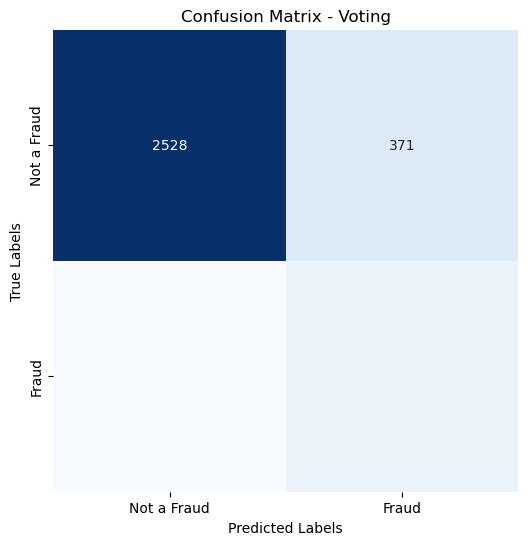

In [348]:
param_grid = {
    'weights': [[0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
}
vt = VotingClassifier(estimators=[('balanced_random_forest_search.best_estimator_', balanced_random_forest_search.best_estimator_), ('model.best_estimator_', model.best_estimator_)], voting='soft')
voting_search = RandomizedSearchCV(estimator=vt, 
                                                  param_distributions=param_grid, 
                                                  n_iter=10, 
                                                  cv=3, 
                                                  verbose=5, 
                                                  random_state=42, 
                                                  n_jobs=-1)
voting_search.fit(X_trainbrf, y_train)

# Retrieve the best estimator
best_vt = voting_search.best_estimator_

# Evaluate the best model
vt_pred = best_vt.predict(X_testbrf)

# Compute performance metrics
vt_acc = accuracy_score(y_test, vt_pred)
vt_bal_acc = balanced_accuracy_score(y_test, vt_pred)
vt_prec = precision_score(y_test, vt_pred)
vt_f1 = f1_score(y_test, vt_pred)
vt_recall = recall_score(y_test, vt_pred)
vt_roc_auc = roc_auc_score(y_test, vt_pred)

# Print performance metrics
print('Voting Classifier (Best Estimator)')
print("Accuracy:", vt_acc)
print("Balanced Accuracy:", vt_bal_acc)
print("Precision:", vt_prec)
print("F1 Score:", vt_f1)
print("Recall:", vt_recall)
print("ROC AUC Score:", vt_roc_auc)
print("Confusion Matrix:\n", confusion_matrix(y_test, vt_pred))
plot_confusion_matrix(y_test,  vt_pred, 'Voting')

In [351]:
data = {
    'Model': ['AdaBoost', 'Balanced Random Forest', 'Voting'],
    'Accuracy': [ ada_acc, brf_acc, vt_acc],
    'Balanced Accuracy': [ ada_bal_acc, brf_bal_acc,  vt_bal_acc],
    'Precision': [ ada_prec, brf_prec,  vt_prec],
    'F1 Score': [ ada_f1, brf_f1,  vt_f1],
    'Recall': [ ada_recall, brf_recall,  vt_recall],
    'ROC AUC': [ ada_roc_auc, brf_roc_auc, vt_roc_auc]
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)

# Display the DataFrame
metrics_df

,Model,Accuracy,Balanced Accuracy,Precision,F1 Score,Recall,ROC AUC
0,AdaBoost,0.913100,0.622317,0.282723,0.287234,0.291892,0.622317
1,Balanced Random Forest,0.703307,0.814354,0.161410,0.275534,0.940541,0.814354
2,Voting,0.872568,0.876553,0.305243,0.453408,0.881081,0.876553
